<a href="https://colab.research.google.com/github/vinhnx/LLM_AI_intro_for_iOS_engineers/blob/main/Intro_to_LLM_GenAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install transformers torch

In [9]:
# Basic example using a simple open-source model
!pip install transformers
from transformers import pipeline

# Initialize a pipeline for text generation
generator = pipeline("text-generation", model="gpt2")

# Generate text
prompt = "Artificial Intelligence is"
result = generator(prompt, max_length=50)
print(result[0]["generated_text"])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Artificial Intelligence is a very complex topic, and the world is getting too complex. In the end, I'm not satisfied with people using it for a couple of reasons – firstly, as the main source of information, but also as the world


In [10]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("gpt2")
text = "func tableView(_ tableView: UITableView, cellForRowAt indexPath: IndexPath)"
tokens = tokenizer.tokenize(text)
print(tokens)

['func', 'Ġtable', 'View', '(_', 'Ġtable', 'View', ':', 'ĠU', 'IT', 'able', 'View', ',', 'Ġcell', 'For', 'Row', 'At', 'Ġindex', 'Path', ':', 'ĠIndex', 'Path', ')']


In [11]:
### 1. Basic Tokenization Example

from transformers import AutoTokenizer


def explore_tokenization():
    # Initialize tokenizer
    tokenizer = AutoTokenizer.from_pretrained("gpt2")

    # Example iOS-related text
    swift_code = """
    func tableView(_ tableView: UITableView,
                  cellForRowAt indexPath: IndexPath) -> UITableViewCell {
        let cell = tableView.dequeueReusableCell(withIdentifier: "Cell")
        return cell
    }
    """

    # Tokenize the text
    tokens = tokenizer.tokenize(swift_code)
    token_ids = tokenizer.encode(swift_code)

    print("Original text:", swift_code)
    print("\nTokens:", tokens)
    print("\nToken IDs:", token_ids)

    # Decode back to text
    decoded_text = tokenizer.decode(token_ids)
    print("\nDecoded text:", decoded_text)


# Run the example
explore_tokenization()

Original text: 
    func tableView(_ tableView: UITableView,
                  cellForRowAt indexPath: IndexPath) -> UITableViewCell {
        let cell = tableView.dequeueReusableCell(withIdentifier: "Cell")
        return cell
    }
    

Tokens: ['Ċ', 'Ġ', 'Ġ', 'Ġ', 'Ġfunc', 'Ġtable', 'View', '(_', 'Ġtable', 'View', ':', 'ĠU', 'IT', 'able', 'View', ',', 'Ċ', 'Ġ', 'Ġ', 'Ġ', 'Ġ', 'Ġ', 'Ġ', 'Ġ', 'Ġ', 'Ġ', 'Ġ', 'Ġ', 'Ġ', 'Ġ', 'Ġ', 'Ġ', 'Ġ', 'Ġ', 'Ġcell', 'For', 'Row', 'At', 'Ġindex', 'Path', ':', 'ĠIndex', 'Path', ')', 'Ġ->', 'ĠU', 'IT', 'able', 'View', 'Cell', 'Ġ{', 'Ċ', 'Ġ', 'Ġ', 'Ġ', 'Ġ', 'Ġ', 'Ġ', 'Ġ', 'Ġlet', 'Ġcell', 'Ġ=', 'Ġtable', 'View', '.', 'de', 'queue', 'Re', 'usable', 'Cell', '(', 'with', 'Ident', 'ifier', ':', 'Ġ"', 'Cell', '")', 'Ċ', 'Ġ', 'Ġ', 'Ġ', 'Ġ', 'Ġ', 'Ġ', 'Ġ', 'Ġreturn', 'Ġcell', 'Ċ', 'Ġ', 'Ġ', 'Ġ', 'Ġ}', 'Ċ', 'Ġ', 'Ġ', 'Ġ', 'Ġ']

Token IDs: [198, 220, 220, 220, 25439, 3084, 7680, 28264, 3084, 7680, 25, 471, 2043, 540, 7680, 11, 198, 220, 220, 220, 220, 220, 220, 

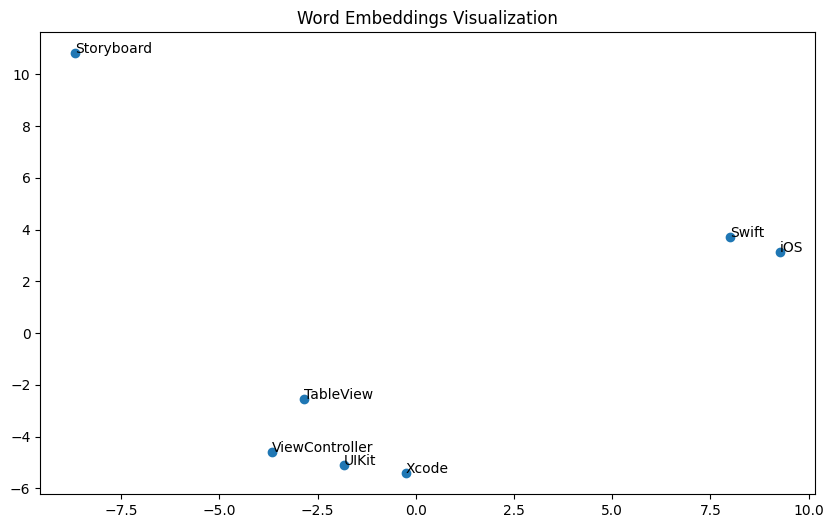

In [12]:
### 2. Embedding Visualization

import matplotlib.pyplot as plt
import torch
from sklearn.decomposition import PCA
from transformers import AutoModel


def visualize_embeddings():
    # Load a pre-trained model
    model = AutoModel.from_pretrained("bert-base-uncased")
    tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

    # iOS-related words
    words = [
        "Swift",
        "UIKit",
        "iOS",
        "Xcode",
        "ViewController",
        "TableView",
        "Storyboard",
    ]

    # Get embeddings
    embeddings = []
    for word in words:
        inputs = tokenizer(word, return_tensors="pt")
        with torch.no_grad():
            outputs = model(**inputs)
        embeddings.append(outputs.last_hidden_state[0][1].numpy())

    # Reduce dimensionality for visualization
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
    plt.title("Word Embeddings Visualization")
    plt.show()


# Run the visualization
visualize_embeddings()

In [ ]:
### 3. Using Hugging Face Pipeline

from transformers import pipeline


def demonstrate_pipeline():
    # Initialize a text generation pipeline
    generator = pipeline("text-generation")

    # Example prompt
    prompt = "Write a Swift function that"

    # Generate text
    result = generator(prompt, max_length=50, num_return_sequences=1)

    print("Generated text:", result[0]["generated_text"])

    # Try other tasks
    summarizer = pipeline("summarization")
    classifier = pipeline("sentiment-analysis")

    # Example usage
    text = """
    The new iOS 15 update brings significant improvements to the user experience.
    It includes better notifications, focus modes, and enhanced privacy features.
    Developers can now take advantage of new APIs and SwiftUI improvements.
    """

    summary = summarizer(text, max_length=50, min_length=10)
    sentiment = classifier(text)

    print("\nSummary:", summary[0]["summary_text"])
    print("Sentiment:", sentiment[0]["label"])


# Run the pipeline example
demonstrate_pipeline()

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
